# TP 1 | Clustering de imágenes


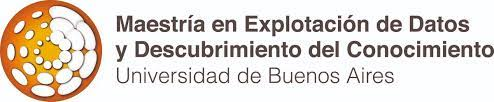

_Data mining en Ciencia y Tecnología_  
2do cuatrimestre 2023

## Importación de bibliotecas 

In [1]:
# bibliotecas (libraries) incorporadas (built-in) de Python
import os
from random import randint
# Para cargar solo una vez las bibliotecas detecta si es la primer ejecución del cuaderno
try:
    os.getegid()
    firstrun = False
except:
    firstrun = True

In [2]:
if (firstrun):
    try:
        from tensorflow.keras.utils  import load_img
    except:
        ! pip install tensorflow
        ! pip install tensorrt
        from tensorflow.keras.utils  import load_img

from tensorflow.keras.utils  import load_img
# for loading/processing the images
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils  import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array

2023-09-26 09:35:39.853633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 09:35:41.208100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


¿Por qué `tensorflow.keras` y `keras`?  
[Stack overflow | keras vs. tensorflow.python.keras - which one to use?](https://stackoverflow.com/questions/48893528/keras-vs-tensorflow-python-keras-which-one-to-use)
> tensorflow.python.keras is just a bundle of keras with a single backend inside tensorflow package. This allows you to start using keras by installing just pip install tensorflow.
> 
> keras package contains full keras library with three supported backends: tensorflow, theano and CNTK. If you even wish to switch between backends, you should choose keras package. This approach is also more flexible because it allows to install keras updates independently from tensorflow (which may not be easy to update, for example, because the next version may require a different version of CUDA driver) or vice versa. For this reason, I prefer to install keras as another package.

In [3]:
if (firstrun):
    try:
        from keras.models import Model
    except:
        ! pip install keras
        from keras.models import Model

from keras.models import Model
# Tensorflow model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

2023-09-26 09:35:42.606154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-26 09:35:42.668971: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Juan: Toma la capa -2 (output), la ante-última.
Cosas por hacer (probar)
- Probar con otra capa intermedia (no la terminal)
  - No es la última, más abstracta, sino tal vez una anterior

In [4]:
if (firstrun):
  try:
    # clustering and dimension reduction
    from sklearn.cluster import KMeans
  except:
    ! pip install scikit-learn
    from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
if (firstrun):
  try:
    import numpy as np
  except:
    ! pip install numpy
    import numpy as np

import numpy as np

In [6]:
if (firstrun):
  try:
    import matplotlib.pyplot as plt
  except:
    ! pip install matlplotlib
    import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

## Funciones provistas por los docentes

In [7]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    print(featsss.shape)
    featsss = featsss.reshape(-1,4096)
    return filenmss, featsss

In [8]:
def extract_features(file, model):
    # levanta imagen como array 224x224
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [9]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

## Lectura de archivos

In [10]:
# if (firstrun):
if('google.colab' in str(get_ipython() ) ):
    environment= 'google'
else:
    import os
    if (os.environ.get('PWD')=='/kaggle/working'):
        environment= 'kaggle'
    else:
        environment= 'local'
print(environment)

local


In [11]:
# if (firstrun):
path2 = 'datasets/Rice_Image_Dataset/Arborio/'
# path2 = 'datasets/Rice_Image_Dataset'
if( environment== 'local' ):
    DIR = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/'
elif( ( environment== 'google' ) ):
    from google.colab import drive
    drive.mount('/content/drive')
    DIR = "/content/drive/MyDrive/maestría/cienciaTecnología/tp1_dmcyt2023/"
elif( ( environment== 'kaggle' ) )  :
    a= 1
image_path = DIR + path2
image_path

'/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/'

In [12]:
path = sorted(
  [
    os.path.join(image_path, file)
    for file in os.listdir(image_path )
    if file.endswith('.jpg')
  ]
)
print(len(path))
print(path[0])

15000
/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (1).jpg


In [14]:
path

['/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (1).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (10).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (100).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (1000).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (10000).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/Arborio (10001).jpg',
 '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/data

In [13]:
## Levanta archivos y extrae features
names, feat = preprocess(path, model)

1/1 [==============================] - 1s 1s/step


KeyboardInterrupt: 

In [ ]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv(image_path+'/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [ ]:
#kmeans = KMeans(n_clusters=len(unique_labels))
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/tp1_dmcyt2023/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(names,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Clipping cluster size from 22 to 10
Clipping cluster size from 56 to 10
Clipping cluster size from 132 to 10


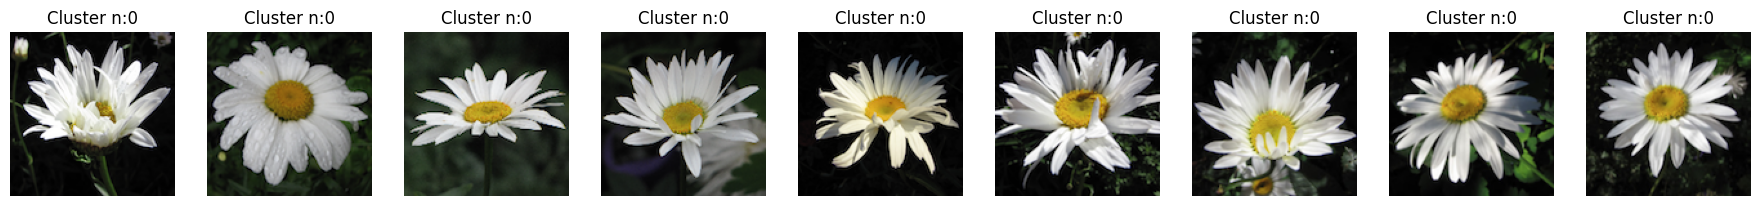

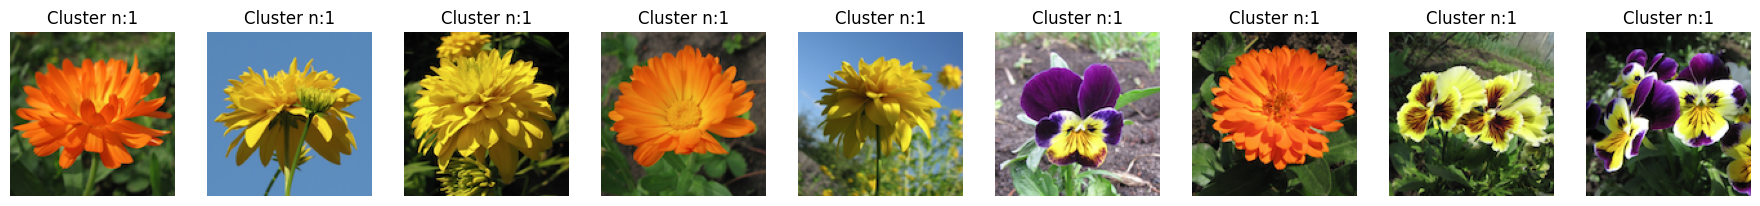

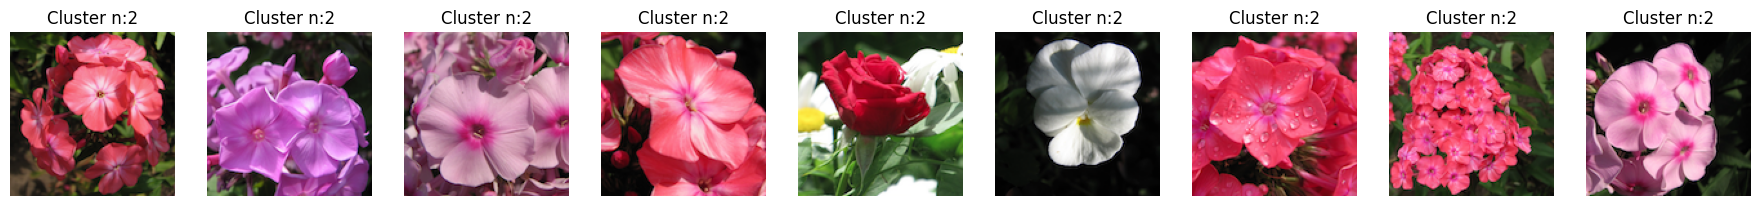

In [ ]:
# display images for each cluster
for n in range(len(groups)):
  view_cluster(groups[n],n)

Text(0, 0.5, 'PC4')

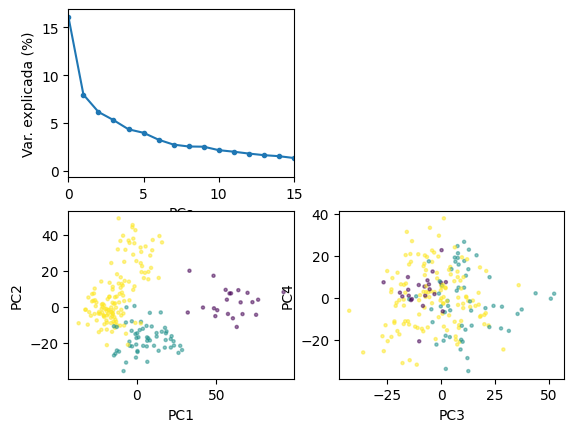

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(100* pca.explained_variance_ / sum(pca.explained_variance_),'.-')
axs[0,0].set_xlim([0,15])
axs[0,0].set_xlabel('PCs')
axs[0,0].set_ylabel('Var. explicada (%)')
axs[0,1].axis('off')

axs[1,0].scatter(x[:,0],x[:,1],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,0].set_xlabel('PC1')
axs[1,0].set_ylabel('PC2')
axs[1,1].scatter(x[:,2],x[:,3],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,1].set_xlabel('PC3')
axs[1,1].set_ylabel('PC4')

Acá se puden hacer interpretaciones viendo los gráficos
- que parece representar cada cluster (que agrupan), e.g. las "flores blancas"